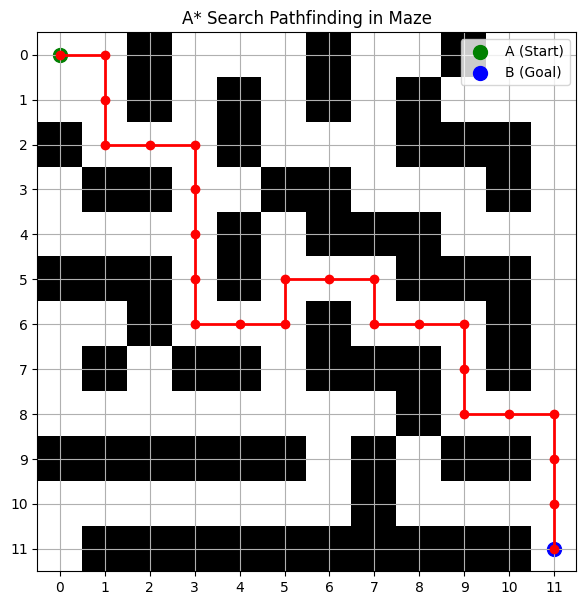

Path found: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (6, 4), (6, 5), (5, 5), (5, 6), (5, 7), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (8, 10), (8, 11), (9, 11), (10, 11), (11, 11)]


In [1]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# Manhattan distance heuristic
# -------------------------------
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# -------------------------------
# A* Search Implementation
# -------------------------------
def astar(maze, start, goal):
    rows, cols = maze.shape
    open_set = []
    heapq.heappush(open_set, (0, start))

    came_from = {}
    g_score = {start: 0}
    f_score = {start: manhattan(start, goal)}

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            # Reconstruct the path from goal to start
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]  # Path from start to goal

        # Possible 4-direction moves
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

        for dx, dy in directions:
            neighbor = (current[0] + dx, current[1] + dy)

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if maze[neighbor] == 1:  # Wall cell
                    continue

                tentative_g = g_score[current] + 1

                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score[neighbor] = tentative_g + manhattan(neighbor, goal)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None  # Path not found

# -------------------------------
# Define Maze Grid with Start (A) and Goal (B)
# -------------------------------
maze5 = [
    ['A', 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
    [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0],
    [1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 'B'],
]

# Convert maze to numpy array and detect start and goal positions
maze_np = np.zeros((len(maze5), len(maze5[0])), dtype=int)
start = goal = None

for i in range(len(maze5)):
    for j in range(len(maze5[0])):
        if maze5[i][j] == 'A':
            start = (i, j)
            maze_np[i, j] = 0
        elif maze5[i][j] == 'B':
            goal = (i, j)
            maze_np[i, j] = 0
        else:
            maze_np[i, j] = maze5[i][j]

# -------------------------------
# Run A* Algorithm
# -------------------------------
path = astar(maze_np, start, goal)

# -------------------------------
# Visualization
# -------------------------------
plt.figure(figsize=(7, 7))
plt.imshow(maze_np, cmap='binary')  # Walls in black, free spaces in white
plt.xticks(range(maze_np.shape[1]))
plt.yticks(range(maze_np.shape[0]))
plt.grid(True)

if path:
    px, py = zip(*path)
    plt.plot(py, px, marker='o', color='red', linewidth=2)

plt.scatter(start[1], start[0], color='green', s=100, label='A (Start)')
plt.scatter(goal[1], goal[0], color='blue', s=100, label='B (Goal)')
plt.legend()
plt.title('A* Search Pathfinding in Maze')
plt.show()

print("Path found:", path)
